In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read the dataset
df = pd.read_csv('../data/population_dynamics_clean.csv')

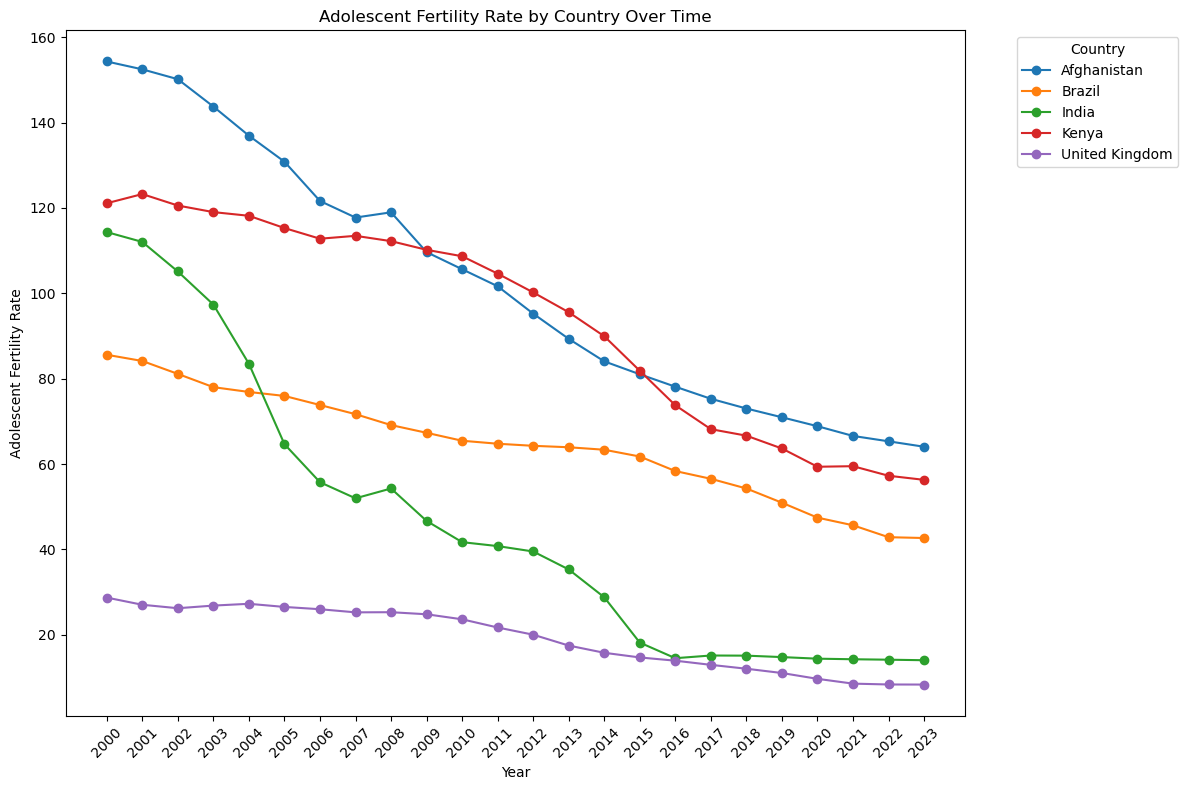

In [9]:
# Adolescent Fertility Rate by Country Over Time

# Prepare the data for plotting
pivot_df = df.pivot(index='year', columns='country', values='adolescent_fertility')

# Plot the line graph
plt.figure(figsize=(12, 8))
pivot_df.plot(ax=plt.gca(), marker='o')
plt.title('Adolescent Fertility Rate by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Adolescent Fertility Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Average Adolescent Fertility Rate by Country

table_2 = (
    df[df['year'].between(2017, 2023)]
    .groupby('country', as_index=False)['adolescent_fertility']
    .mean()
    .round(3)
)
table_2.columns = ['Country', 'Average Adolescent Fertility (2017–2023)']
table_2

,Country,Average Adolescent Fertility (2017–2023)
0,Afghanistan,69.167
1,Brazil,48.643
2,India,14.579
3,Kenya,61.568
4,United Kingdom,10.161


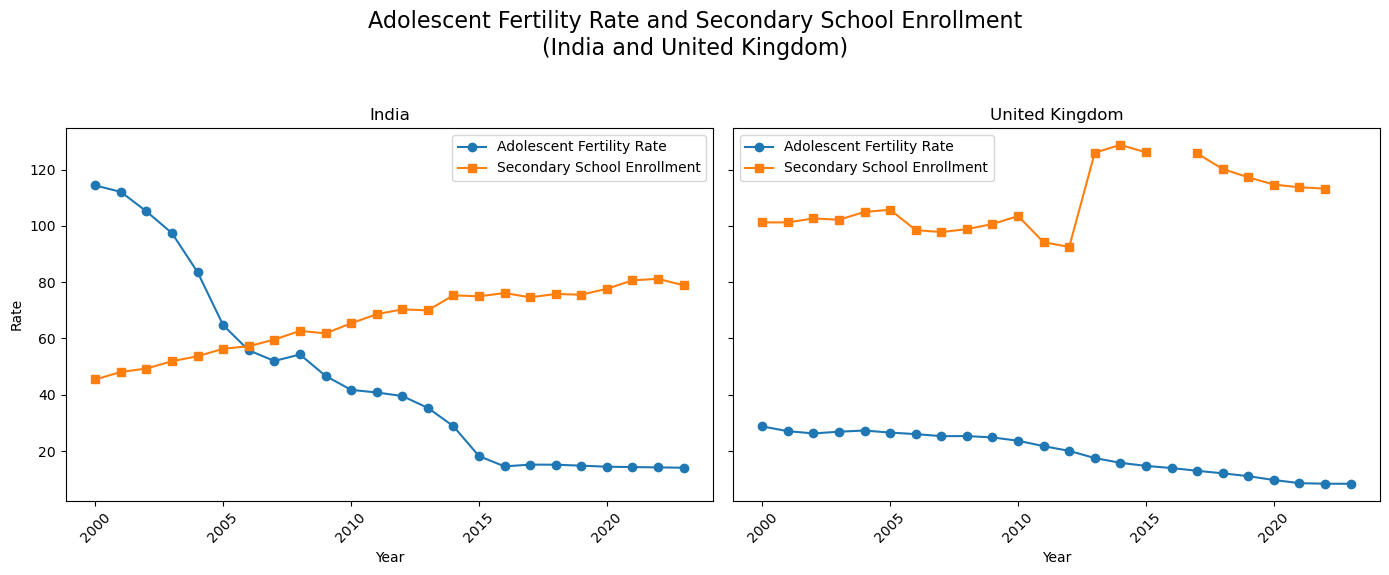

In [13]:
# Adolescent Fertility Rate and Secondary School Enrollment

# Prepare the data for plotting
pivot_df_adolescent_fertility = df.pivot(index='year', columns='country', values='adolescent_fertility')
pivot_df_secondary_school_enrollment = df.pivot(index='year', columns='country', values='secondary_school_enrollment')

# Plot the graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# India
axes[0].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['India'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[0].plot(
    pivot_df_secondary_school_enrollment.index,
    pivot_df_secondary_school_enrollment['India'],
    marker='s',
    label='Secondary School Enrollment',
    color='tab:orange'
)
axes[0].set_title('India')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rate')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# United Kingdom
axes[1].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['United Kingdom'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[1].plot(
    pivot_df_secondary_school_enrollment.index,
    pivot_df_secondary_school_enrollment['United Kingdom'],
    marker='s',
    label='Secondary School Enrollment',
    color='tab:orange'
)
axes[1].set_title('United Kingdom')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle('Adolescent Fertility Rate and Secondary School Enrollment\n(India and United Kingdom)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()